## Assignment 8
Load the data from auto-mpg.data into a pandas DataFrame. Perform some minor cleanup and transformation tasks, then use exploratory data analysis to learn about the distribution of variables and the relationship between variables.

### Import modules. Then read in data, specifying column names, and index by car name.

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series 
import seaborn as sns 
%matplotlib inline
import pylab as pl
from pandas import *

cars = pd.read_fwf('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', header=None, names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']).set_index('car_name')
cars.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
car_name,,,,,,,,
"""chevrolet chevelle malibu""",18.0,8,307.0,130.0,3504.0,12.0,70,1
"""buick skylark 320""",15.0,8,350.0,165.0,3693.0,11.5,70,1
"""plymouth satellite""",18.0,8,318.0,150.0,3436.0,11.0,70,1
"""amc rebel sst""",16.0,8,304.0,150.0,3433.0,12.0,70,1
"""ford torino""",17.0,8,302.0,140.0,3449.0,10.5,70,1


### Replace ‘?’ values in the horsepower column with a pandas-appropriate missing value, then convert the column to numeric.

In [89]:
cars = cars.replace('?', np.nan)
cars['horsepower'].astype(float)

car_name
"chevrolet chevelle malibu"           130.0
"buick skylark 320"                   165.0
"plymouth satellite"                  150.0
"amc rebel sst"                       150.0
"ford torino"                         140.0
"ford galaxie 500"                    198.0
"chevrolet impala"                    220.0
"plymouth fury iii"                   215.0
"pontiac catalina"                    225.0
"amc ambassador dpl"                  190.0
"dodge challenger se"                 170.0
"plymouth 'cuda 340"                  160.0
"chevrolet monte carlo"               150.0
"buick estate wagon (sw)"             225.0
"toyota corona mark ii"                95.0
"plymouth duster"                      95.0
"amc hornet"                           97.0
"ford maverick"                        85.0
"datsun pl510"                         88.0
"volkswagen 1131 deluxe sedan"         46.0
"peugeot 504"                          87.0
"audi 100 ls"                          90.0
"saab 99e"             

### Convert the origin column values from 1, 2, and 3 to ‘USA’, ‘Asia’, and ‘Europe’.

In [90]:
cars["origin"].replace([1,2,3], (['USA', 'Asia', 'Europe']), inplace=True)
cars.tail(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
car_name,,,,,,,,
"""chrysler lebaron medallion""",26.0,4,156.0,92.00,2585.0,14.5,82,USA
"""ford granada l""",22.0,6,232.0,112.0,2835.0,14.7,82,USA
"""toyota celica gt""",32.0,4,144.0,96.00,2665.0,13.9,82,Europe
"""dodge charger 2.2""",36.0,4,135.0,84.00,2370.0,13.0,82,USA
"""chevrolet camaro""",27.0,4,151.0,90.00,2950.0,17.3,82,USA
"""ford mustang gl""",27.0,4,140.0,86.00,2790.0,15.6,82,USA
"""vw pickup""",44.0,4,97.0,52.00,2130.0,24.6,82,Asia
"""dodge rampage""",32.0,4,135.0,84.00,2295.0,11.6,82,USA
"""ford ranger""",28.0,4,120.0,79.00,2625.0,18.6,82,USA


### Create a bar chart that shows the distribution for cylinders.

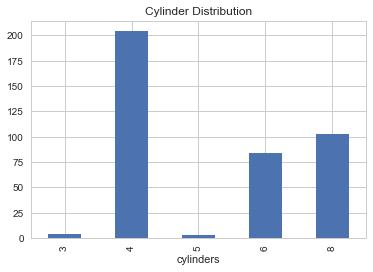

In [91]:
sns.set_style('whitegrid')
newset = cars.groupby('cylinders')
newset['cylinders'].count().plot.bar(title="Cylinder Distribution")

### Create a scatterplot that shows the relationship between horsepower and weight.

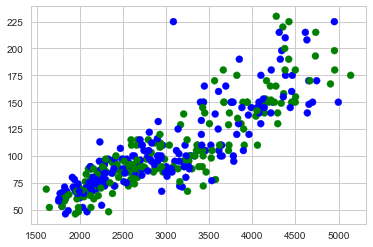

In [92]:
colors = ['green','blue']
plt.scatter(cars.weight, cars.horsepower, c=colors)

### How is horsepower and miles per gallon distributed among different countries?

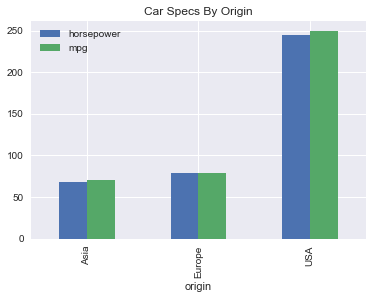

In [93]:
sns.set_style('darkgrid')
newset = cars.groupby('origin')
newset['horsepower','mpg'].count().plot.bar(title="Car Specs By Origin")

### How is horsepower, acceleration, and weight distributed by model year?

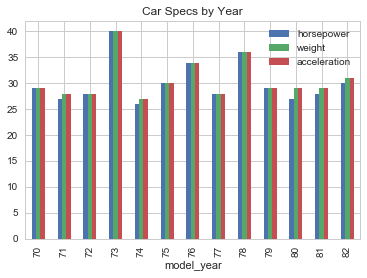

In [94]:
sns.set_style('whitegrid')
newset = cars.groupby('model_year')
newset['horsepower','weight','acceleration'].count().plot.bar(title="Car Specs by Year")